<a href="https://colab.research.google.com/github/kentokura/python_medical_images/blob/master/chapter3/chap3_12_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow
from google.colab import drive
from IPython.display import Image, display_png

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 3.12 画像フィルタ処理
- 平滑化, エッジ検出, 線検出(ガボールフィルタ)
- 空間周波数フィルタリング

メディアンフィルタによるフィルタリングは、cv2.medianBlur()メソッドを用いて行える。

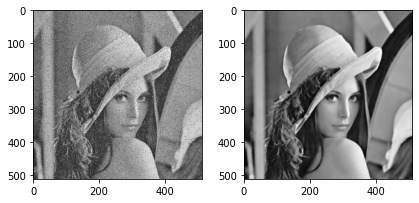

In [2]:
noise = cv2.imread('/content/drive/My Drive/DATASET/dataset/lena-noise1.png',
                   cv2.IMREAD_GRAYSCALE)

plt.subplot(1, 2, 1)
plt.imshow(noise, cmap='gray')
plt.tight_layout()

# メディアンフィルタによるフィルタリング
# フィルタサイズを5×5で設定
median = cv2.medianBlur(noise, 5)
plt.subplot(1, 2, 2)
plt.imshow(median, cmap='gray')
plt.tight_layout()

リスト 3.12.2 空間周波数フィルタの比較

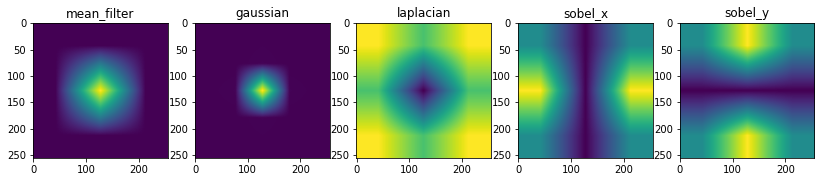

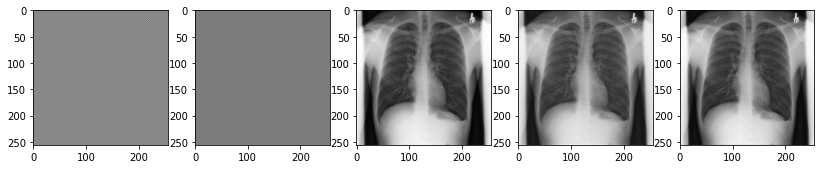

In [13]:
from numpy.fft import *
img = cv2.imread('/content/drive/My Drive/DATASET/dataset/ChestXray256_uint8.png',
                 cv2.IMREAD_GRAYSCALE).astype(float)

# 平均フィルタの重み
mean_filter = np.ones((3,3))
# ガウシアンフィルタ
x = cv2.getGaussianKernel(5, 10)
gaussian = x*x.T
# エッジ検出フィルタ系
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

laplacian = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

# 空間フィルタをリスト化
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y]
# グラフようにタイトルを順番にリスト化
filter_name = ['mean_filter', 'gaussian', 'laplacian', 'sobel_x', 'sobel_y']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
# 空間周波数フィルタをパワースペクトル画像へ
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
mag_spectrum = [cv2.resize(z, (256,256), cv2.INTER_LANCZOS4) for z in mag_spectrum]
fft_chest = fft2(img)
_, filters = plt.subplots(1, 5, figsize=(14, 14))
filters = filters.flatten()
for i in range(5):
  filters[i].imshow(mag_spectrum[i])
  filters[i].set_title(filter_name[i])
plt.show()

# フィルタリング処理結果の表示
_, filters = plt.subplots(1, 5, figsize=(14, 14))
filters = filters.flatten()
for i in range(5):
  f_fft_chest = np.copy(fft_chest) * mag_spectrum[i]
  invert = ifft2(f_fft_chest)
  filters[i].imshow(invert.real, cmap='gray')
plt.show()


## 3.13

- 閾値による２値化とマスク画像作成

### 3.13.1 ２値化と関心領域(ROY)


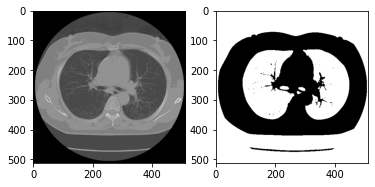

In [15]:
img = cv2.imread('/content/drive/My Drive/DATASET/dataset/CT_LEE_IR87a-NOCAL.png',
                 cv2.IMREAD_GRAYSCALE)
mask = cv2.inRange(src=img, lowerb =120, upperb=125)
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(mask, 'gray')
plt.show()

### 3.13.2 2値化の手法

リスト 3.12.2

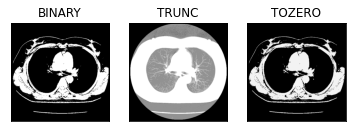

In [17]:
img = cv2.imread('/content/drive/My Drive/DATASET/dataset/CT_LEE_IR87a-NOCAL.png',
                 cv2.IMREAD_GRAYSCALE)

# cv2.threshold( 入力ピクセル配列, 閾値上限, 上限以上の画素の置換値, 利用するアルゴリズム
# threshold...閾値
ret1, thresh1 = cv2.threshold(np.copy(img), 127, 255, cv2.THRESH_BINARY)
ret1, thresh2 = cv2.threshold(np.copy(img), 127, 255, cv2.THRESH_TRUNC)
ret1, thresh3 = cv2.threshold(np.copy(img), 127, 255, cv2.THRESH_TOZERO)

titles = ["BINARY", 'TRUNC', 'TOZERO']
images = [thresh1,thresh2,thresh3]
for i in range(3):
  plt.subplot(1, 3, i+1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])
plt.show()